In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
import sklearn

In [3]:
df = pd.read_csv("08-Linear-Regression-Models/Advertising.csv")
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [7]:
X=df.drop('sales',axis=1)
y=df['sales']

In [9]:
from sklearn.preprocessing import PolynomialFeatures

In [21]:
polyconverter = PolynomialFeatures(degree=2,include_bias=False)


In [22]:
polyconverter.fit(X)

PolynomialFeatures(include_bias=False)

In [23]:
polyconverter.transform(X)

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [24]:
polyTransform = polyconverter.transform(X)

In [25]:
polyTransform[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(polyTransform, y, test_size=0.3, random_state=101)

In [28]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [29]:
test_pred = model.predict(X_test)

In [30]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [31]:
mae = mean_absolute_error(y_test,test_pred)
mse = mean_squared_error(y_test,test_pred)
rmse = np.sqrt(mse)

In [32]:
mae

0.4896798044803753

In [33]:
#create different poly order,  split poly features into train/test, fit on train, then svae rsme on both train/test
#plot results
train_rmse_errors = []
test_rmse_errors = []

for d in range(1,10):
    polyconverter = PolynomialFeatures(degree=d,include_bias=False)
    polyfeats = polyconverter.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(polyfeats, y, test_size=0.3, random_state=101)
    model = LinearRegression()
    model.fit(X_train,y_train)
    trainpred = model.predict(X_train)
    testpred = model.predict(X_test)
    train_rmse = np.sqrt(mean_squared_error(y_train,trainpred))
    test_rmse = np.sqrt(mean_squared_error(y_test,testpred))
    train_rmse_errors.append(train_rmse)
    test_rmse_errors.append(test_rmse)


In [35]:
#train_rmse_errors
test_rmse_errors

[1.5161519375993877,
 0.664643175726923,
 0.5803286825222178,
 0.5077742637679717,
 2.575816423560122,
 4.253784096696822,
 1379.0326592097938,
 4215.8915634123605,
 97108.37418232282]

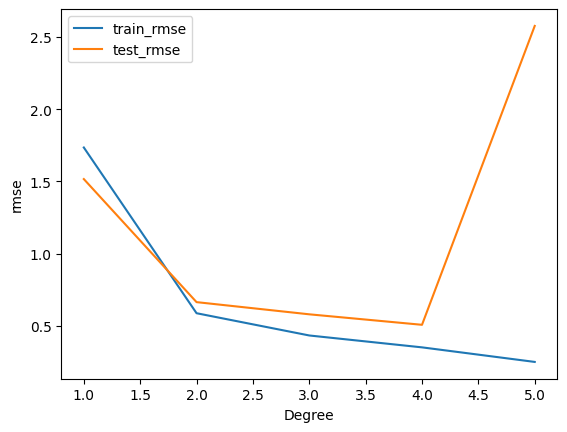

In [43]:
plt.plot(range(1,6),train_rmse_errors[:5],label="train_rmse")
plt.plot(range(1,6),test_rmse_errors[:5],label="test_rmse")
plt.xlabel("Degree")
plt.ylabel("rmse")
plt.legend()

In [45]:
finalpoly = PolynomialFeatures(degree=3,include_bias=False)
finalModel = LinearRegression()
finalModel.fit(finalpoly.fit_transform(X),y)

LinearRegression()

In [47]:
from joblib import dump,load
dump(finalModel,'FinalPolyModel.joblib')
dump(finalpoly,'finalPolyConverter.joblib')

['finalPolyConverter.joblib']

In [48]:
loaded_converter = load('finalPolyConverter.joblib')
loaded_model = load('FinalPolyModel.joblib')

In [50]:
campaign = [[149,22,12]]

In [51]:
transformdata = loaded_converter.fit_transform(campaign)

In [52]:
loaded_model.predict(transformdata)

array([14.64501014])